In [1]:
import pandas as pd
df = pd.read_csv('titanicData.csv')
# df.head()
df.tail()
# df.columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [2]:
# Para localizar un registro por su indice, el primer registro tiene el indice 0
df.iloc[0:2]

# Muestra aleatoria. Random_state es la semilla. La distribución no necesariamente es uniforme.
df.sample(n = 100, random_state=20)

df.describe()
# Podemos ver que Age tiene Nulls porque su conteo no es el mismo, y que había un bebé.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Vista BDD estamos generando una "vista" porque la media no existe en las tablas
# Un solo corchete es formato Series (una sola columna), dos corchetes son DF
# Según el profesor la media es el valor más probable, esto es totalmente erroneo...
df['Age'].mean()
df.mean()

# Vista BDD estamos utilizando un "select", porque la edad si existe en las tablas
# ¡Debemos ser cautos con los DF que creamos porque se almacenan e RAM! 
# Python es muy malo manejando memoria. Si borramos la VS no libera memoria

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [4]:
df[['Age','Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,NaN,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2


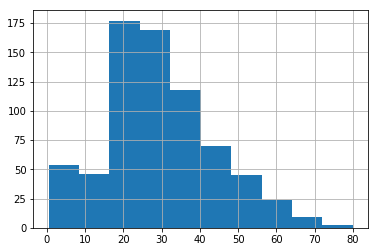

In [6]:
%matplotlib inline
# Un histograma muestra la distribución empírica de frecuencias 
df['Age'].hist()


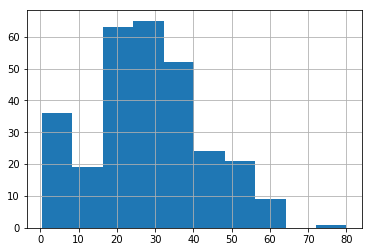

In [7]:
# En terminos de BDD estamos usando un where
df['Survived']==1

df[df['Survived']==1]['Age'].hist()

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

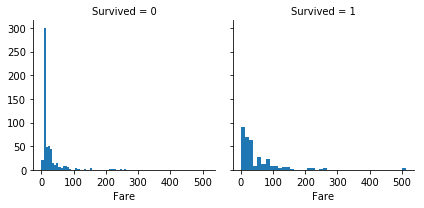

In [17]:
import seaborn as sns
import pylab as plt

# Divide las columnas por los sobreviviente (cero y uno). 
# Debemos ser cuidadosos con esta función, si la VS tiene cientos de valores, tendremos cientos de gráficas
g = sns.FacetGrid(df, col = 'Survived')# Del objeto "g" dibuja un histograma de la edad. El deafult de lso bins es 10
g.map(plt.hist, 'Fare', bins=40)

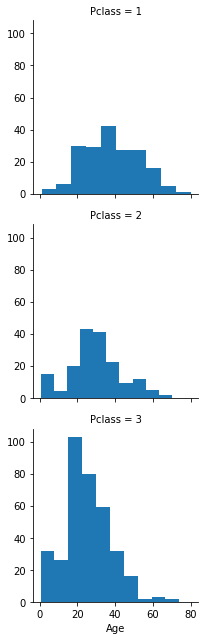

In [18]:
# Divide las clases por filas

g = sns.FacetGrid(df, row = 'Pclass')
g.map(plt.hist, 'Age', bins=10)

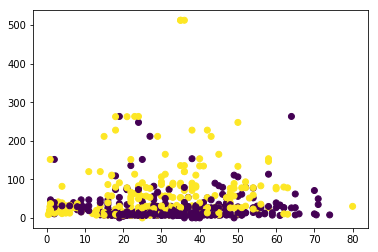

In [23]:
# La mayoría de las gráficas no se tienen que presentar, som simplemente exploración. 
# Presentamos las que tengan impacto. 
plt.scatter(x = 'Age', y = 'Fare', c = 'Survived',data =df)
#help(plt.scatter)

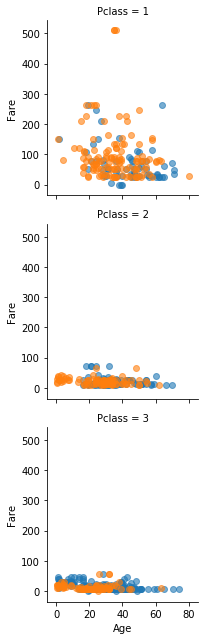

In [24]:
# Alpha es la transparencia. Hue es el color.
g = sns.FacetGrid(df, row ='Pclass', hue = 'Survived')
g.map(plt.scatter, 'Age', 'Fare', alpha =0.6)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""#### Datos"""

datos = pd.read_csv("titanicData.csv")
datos.head(8)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [26]:
"""#### Limpieza del conjunto de datos
* Los valores NaN de la edad se reemplazan por la media de la edad
* Se elimina la columna de la cabina
* Se eliminan los registros con valores faltantes
"""

datos['Age'] = datos['Age'].fillna(int(datos['Age'].mean()))
datos.drop("Cabin",inplace=True,axis=1)
datos.dropna(inplace=True)

datos.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S


In [27]:

"""Se cambian los valores categóricos a valores numéricos (binarización)"""

sex = pd.get_dummies(datos["Sex"],drop_first=True)
embarked = pd.get_dummies(datos["Embarked"],drop_first=True)
pclass = pd.get_dummies(datos["Pclass"],drop_first=True)

datos = pd.concat([datos,pclass,sex,embarked],axis=1)

datos.head(8)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q,0,1,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,1,1,0,1


In [28]:
"""Se eliminan las columnas que no se utilizarán en el modelo"""

datos.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

datos.head(8)

"""#### Creación del modelo"""

x = datos.drop("Survived",axis=1)
y = datos["Survived"]


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Crear modelo de regresión logística

from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter = 1000)
modelo.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
"""#### Evaluación del modelo
Como referencia, se puede utilizar el recurso siguiente:
https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2
"""

# Estimar la clase
y_pred = modelo.predict(x_test)
print(y_pred)

# Estimar la probabilidad de clase
p_pred = modelo.predict_proba(x_test)
print(p_pred)

# Mostrar las estadísticas del desempeño
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


[1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 1]
[[0.3128151  0.6871849 ]
 [0.98949569 0.01050431]
 [0.1459484  0.8540516 ]
 [0.68592648 0.31407352]
 [0.74371325 0.25628675]
 [0.81203709 0.18796291]
 [0.73593757 0.26406243]
 [0.72711303 0.27288697]
 [0.45427443 0.54572557]
 [0.6426599  0.3573401 ]
 [0.58197472 0.41802528]
 [0.06428781 0.93571219]
 [0.26688801 0.73311199]
 [0.73200218 0.26799782]
 [0.26455872 0.73544128]
 [0.91471375 0.08528625]
 [0.24101955 0.75898045]
 [0.50689111 0.49310889]
 [0.882

In [34]:
import seaborn as sns

score = modelo.score(x_test,y_test)
print(score)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


0.7715355805243446


ValueError: Must pass 2-d input

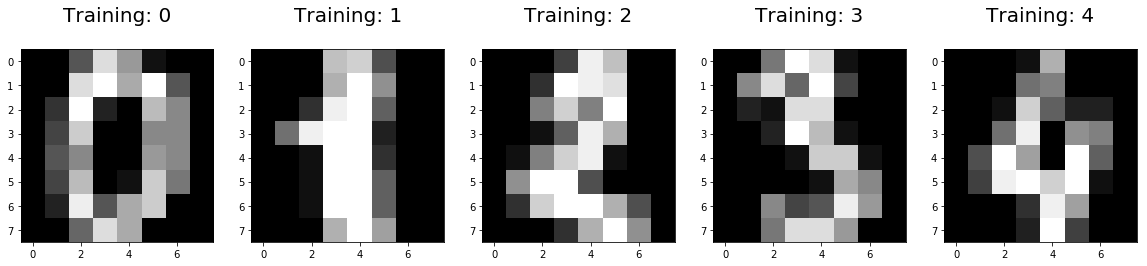

In [35]:
from sklearn.datasets import load_digits
digitos = load_digits()

import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for i, (imagen, etiqueta) in enumerate(zip(digitos.data[0:5], digitos.target[0:5])):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(imagen, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % etiqueta, fontsize = 20)


In [37]:
"""#### Creación del modelo"""

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digitos.data, digitos.target, test_size=0.25, random_state=0)

# Crear modelo de regresión logística

"""#### Evaluación del modelo
Como referencia, se puede utilizar el recurso siguiente:
https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2
"""

'#### Evaluación del modelo\nComo referencia, se puede utilizar el recurso siguiente:\nhttps://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2\n'

In [39]:

# Estimar la clase

# Estimar la probabilidad de clase

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print(cm)



ValueError: Found input variables with inconsistent numbers of samples: [450, 267]

In [40]:

import seaborn as sns

score = modelo.score(x_test,y_test)

sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Índice en el subconjunto de datos de prueba x_test
indice = 9

plt.imshow(np.reshape(x_test[indice], (8,8)), cmap = plt.cm.gray)
plt.title('Etiqueta: %i\nPrediccion: %i\n' % (y_test[indice],y_pred[indice]), fontsize = 20)



ValueError: X has 64 features per sample; expecting 9